In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from numpy.fft import fft2, fftshift

In [2]:
import numpy as np
from scipy.signal import hilbert

def rf_to_bmode(rf_image):
    """
    Convert RF image to B-mode image using envelope detection and log compression.

    Parameters:
    - rf_image: 2D numpy array, beamformed RF data (e.g., img_fkmig)

    Returns:
    - bmode_image: 2D numpy array, log-compressed B-mode image in dB
    """
    # Envelope detection along axial axis
    envelope = np.abs(hilbert(rf_image.T, axis=0)).T

    # Normalize
    envelope_normalized = envelope / np.max(envelope)

    # Log compression
    bmode_image = 20 * np.log10(np.finfo(float).eps + envelope_normalized)

    return bmode_image

In [3]:
# Load the uploaded .mat file
phantom_mat_path = "exp/datasets/Phantom/Phantom.mat"
phantom_data = sio.loadmat(phantom_mat_path)

# List the keys in the .mat file
phantom_data_keys = list(phantom_data.keys())
phantom_data_keys

['__header__', '__version__', '__globals__', 'img_fkmig']

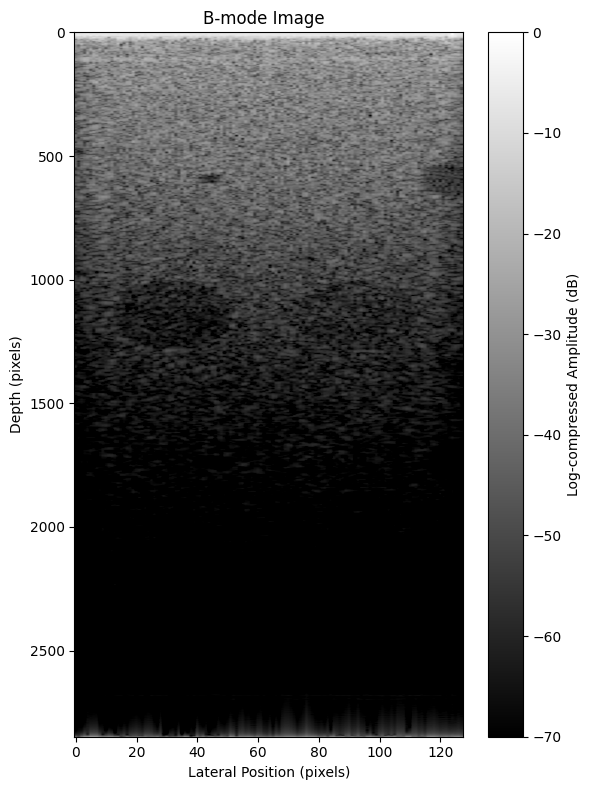

In [4]:
# Extract the beamformed image
rf = phantom_data["img_fkmig"]

# Apply envelope detection using Hilbert transform
envelope = np.abs(hilbert(rf, axis=0))

# Normalize and log compress
envelope_normalized = envelope / np.max(envelope)
bmode_image = 20 * np.log10(envelope_normalized + 1e-6)

# Display the B-mode image
plt.figure(figsize=(6, 8))
plt.imshow(bmode_image, cmap='gray', aspect='auto')
plt.title('B-mode Image  ')
plt.xlabel('Lateral Position (pixels)')
plt.ylabel('Depth (pixels)')
plt.colorbar(label='Log-compressed Amplitude (dB)')
plt.clim([-70, 0])
plt.tight_layout()
plt.show()


In [5]:
print('RF shape:', rf.shape)
print('RF range: min =', np.min(rf), ', max =', np.max(rf))

RF shape: (2849, 128)
RF range: min = -32278.701654287335 , max = 30297.219387517736


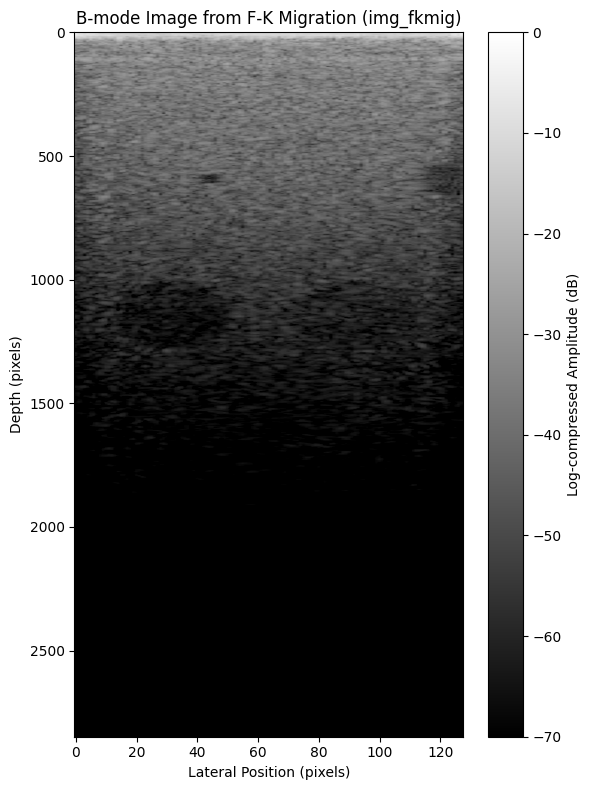

In [6]:
bmode = rf_to_bmode(rf)

# Display the B-mode image
plt.figure(figsize=(6, 8))
plt.imshow(bmode, cmap='gray', aspect='auto')
plt.title('B-mode Image from F-K Migration (img_fkmig)')
plt.xlabel('Lateral Position (pixels)')
plt.ylabel('Depth (pixels)')
plt.colorbar(label='Log-compressed Amplitude (dB)')
plt.clim([-70, 0])
plt.tight_layout()
plt.show()


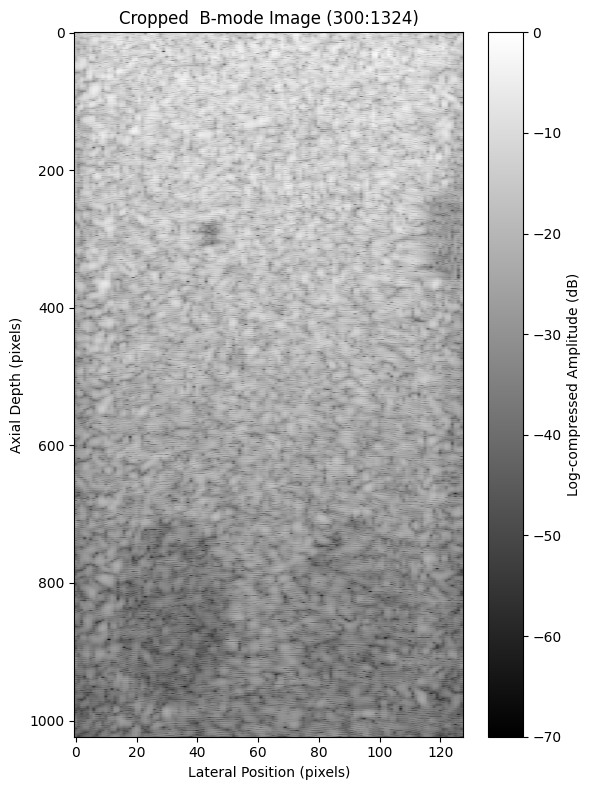

In [39]:
# Extract the beamformed image
rf = phantom_data["img_fkmig"]

# Crop the axial dimension (rows) from index 10 to 1500
rf_cropped = rf[300:1324, :]
bmode_cropped = rf_to_bmode(rf_cropped)
# Display the cropped image
plt.figure(figsize=(6, 8))
plt.imshow(bmode_cropped, cmap='gray', aspect='auto')
plt.title('Cropped  B-mode Image (300:1324)')
plt.xlabel('Lateral Position (pixels)')
plt.ylabel('Axial Depth (pixels)')
plt.colorbar(label='Log-compressed Amplitude (dB)')
plt.clim([-70, 0])
plt.tight_layout()
plt.show()


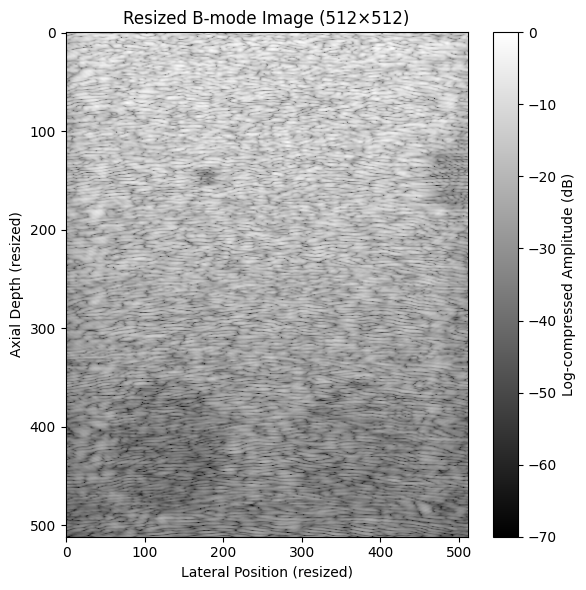

In [8]:
from skimage.transform import resize

# Resize the cropped RF image to 512×512
rf_resized = resize(rf_cropped, (512, 512), mode='reflect', anti_aliasing=True)

# Convert resized RF to B-mode image
bmode_resized = rf_to_bmode(rf_resized)

# Display the resized B-mode image
plt.figure(figsize=(6, 6))
plt.imshow(bmode_resized, cmap='gray', aspect='auto')
plt.title('Resized B-mode Image (512×512)')
plt.xlabel('Lateral Position (resized)')
plt.ylabel('Axial Depth (resized)')
plt.colorbar(label='Log-compressed Amplitude (dB)')
plt.clim([-70, 0])
plt.tight_layout()
plt.show()


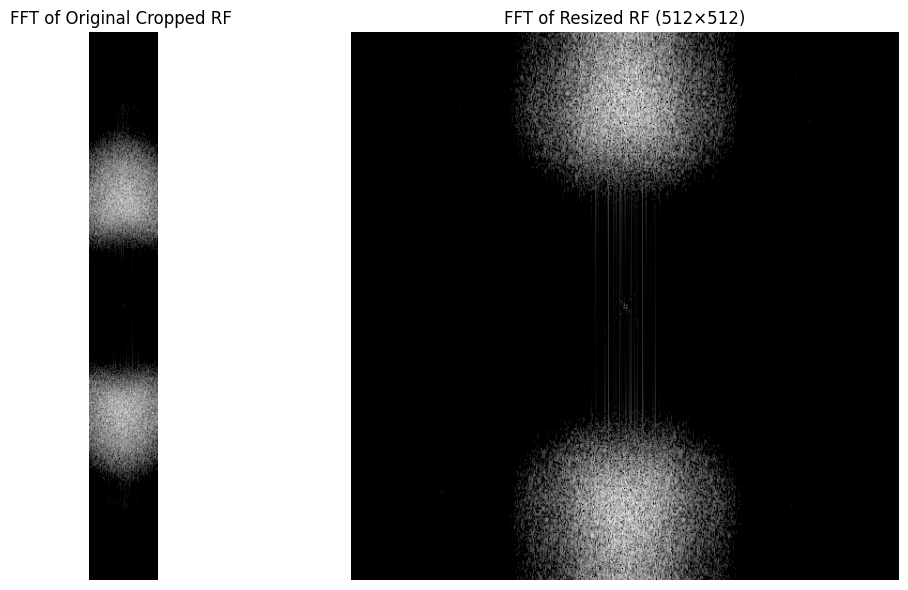

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from skimage.transform import resize
from scipy.io import loadmat

# Load original RF data
phantom_data = loadmat("exp/datasets/Phantom/Phantom.mat")
rf = phantom_data["img_fkmig"]
#rf_cropped = rf[10:1500, :]

# Resize to 512×512
rf_resized = resize(rf_cropped, (512, 512), mode='reflect', anti_aliasing=True)

# Compute FFT magnitude function
def compute_fft_magnitude(image):
    fft_img = fftshift(fft2(image))
    fft_magnitude = 20 * np.log10(np.abs(fft_img) / np.max(np.abs(fft_img)) + 1e-8)
    return fft_magnitude

# Compute FFT magnitudes
fft_original = compute_fft_magnitude(rf_cropped)
fft_resized = compute_fft_magnitude(rf_resized)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(fft_original, cmap='gray', vmin=-40, vmax=0)
axes[0].set_title('FFT of Original Cropped RF ')
axes[0].axis('off')

axes[1].imshow(fft_resized, cmap='gray', vmin=-40, vmax=0)
axes[1].set_title('FFT of Resized RF (512×512)')
axes[1].axis('off')

plt.tight_layout()
plt.show()


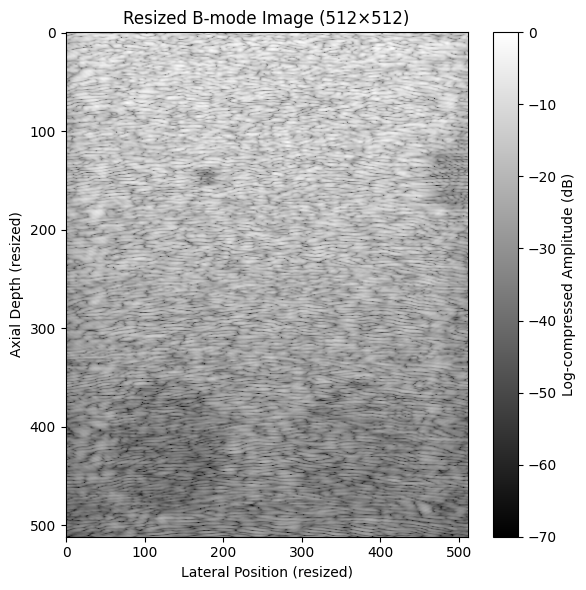

In [10]:
bmode_resized = rf_to_bmode(rf_resized)
# Display the resized B-mode image
plt.figure(figsize=(6, 6))
plt.imshow(bmode_resized, cmap='gray', aspect='auto')
plt.title('Resized B-mode Image (512×512)')
plt.xlabel('Lateral Position (resized)')
plt.ylabel('Axial Depth (resized)')
plt.colorbar(label='Log-compressed Amplitude (dB)')
plt.clim([-70, 0])
plt.tight_layout()
plt.show()


In [11]:
import scipy.io as sio

# --- Save resized RF (not B-mode) ---
save_path = "exp/datasets/Phantom/rf_resized.mat"
sio.savemat(save_path, {'rf_resized': rf_resized})  # change key name to reflect variable
print(f"Saved to {save_path}")

Saved to exp/datasets/Phantom/rf_resized.mat


In [13]:
import scipy.io
# Load the estimated PSF from the uploaded psf.mat file
psf_mat_path = 'exp/datasets/Phantom/Phan_psf_org.mat'
psf_data = scipy.io.loadmat(psf_mat_path)

# List keys to identify the PSF variable
psf_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'cropped_psf'])

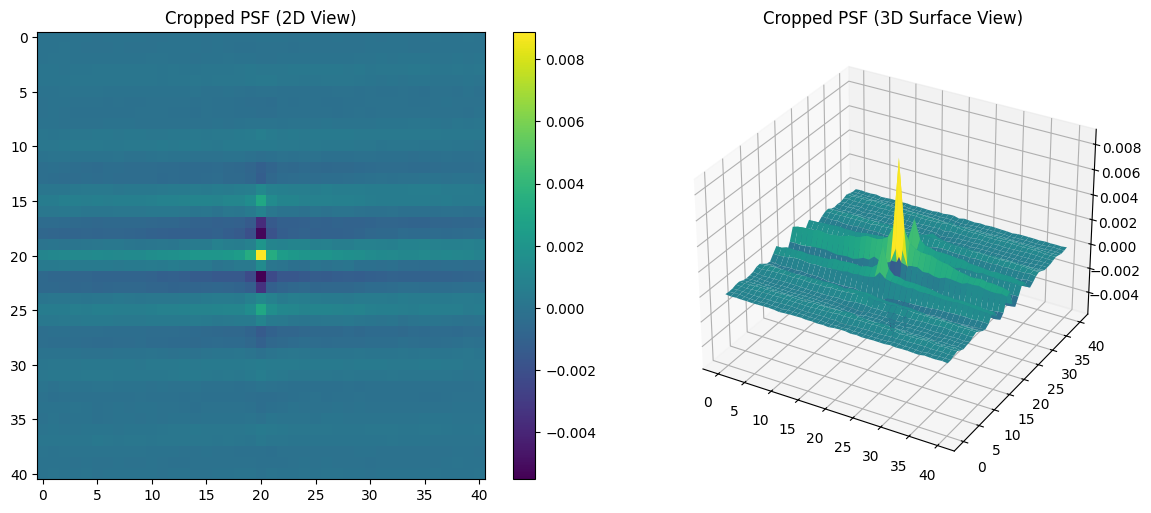

In [14]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the cropped PSF from the uploaded .mat file
mat = scipy.io.loadmat('exp/datasets/Phantom/Phan_psf_org.mat')
cropped_psf = mat['cropped_psf']

# Plot the 2D image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cropped_psf, cmap='viridis')
plt.title('Cropped PSF (2D View)')
plt.axis('image')
plt.colorbar()

# Plot the 3D surface
ax = plt.subplot(1, 2, 2, projection='3d')
x = np.arange(cropped_psf.shape[1])
y = np.arange(cropped_psf.shape[0])
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, cropped_psf, cmap='viridis', edgecolor='none')
ax.set_title('Cropped PSF (3D Surface View)')

plt.tight_layout()
plt.show()

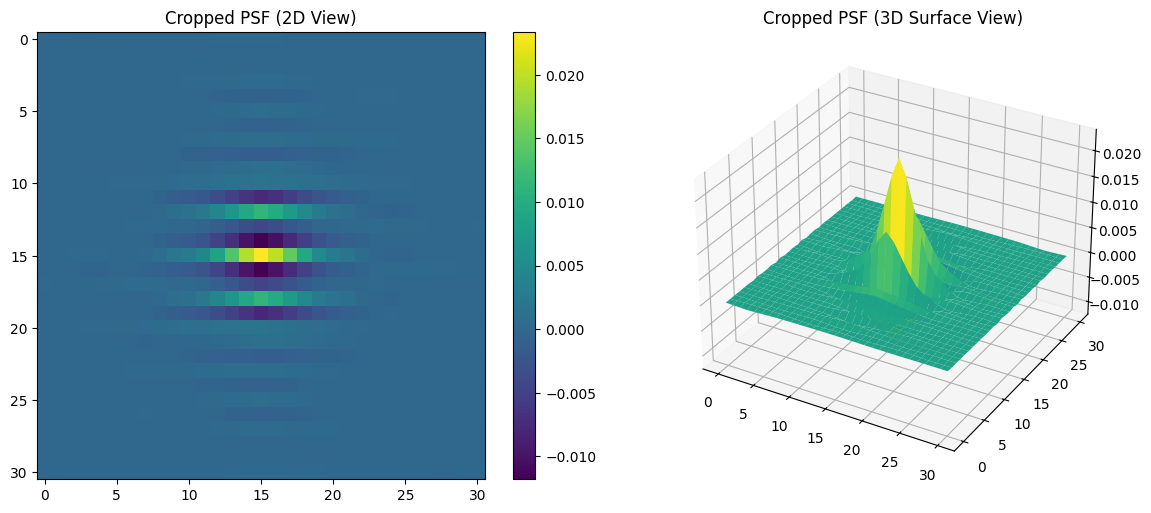

In [15]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the cropped PSF from the uploaded .mat file
mat = scipy.io.loadmat('exp/datasets/Phantom/psf_512.mat')
cropped_psf = mat['cropped_psf']

# Plot the 2D image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cropped_psf, cmap='viridis')
plt.title('Cropped PSF (2D View)')
plt.axis('image')
plt.colorbar()

# Plot the 3D surface
ax = plt.subplot(1, 2, 2, projection='3d')
x = np.arange(cropped_psf.shape[1])
y = np.arange(cropped_psf.shape[0])
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, cropped_psf, cmap='viridis', edgecolor='none')
ax.set_title('Cropped PSF (3D Surface View)')

plt.tight_layout()
plt.show()

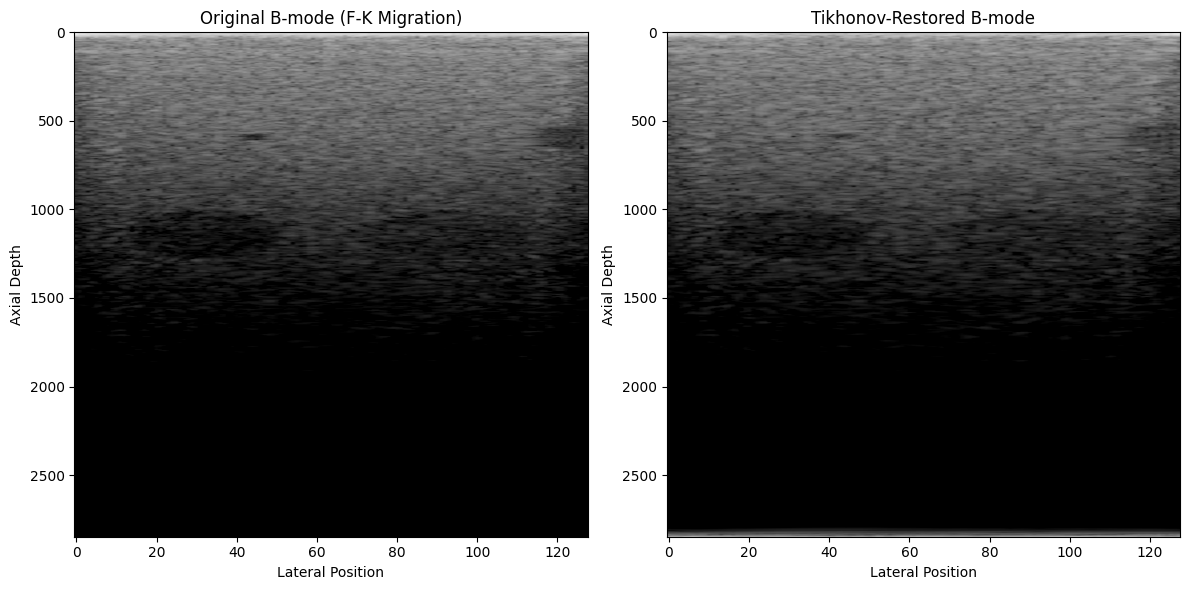

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import hilbert, correlate
import warnings
warnings.filterwarnings('ignore')

# 1. Load raw RF data
data = loadmat('exp/datasets/Phantom/Phantom.mat')
rf = data['img_fkmig']
rfn = rf / np.max(np.abs(rf))  # normalized RF

# 2. Tikhonov restoration (Wiener filter)
#psf_data = loadmat('exp/datasets/Phantom/psf_cropped.mat')
psf_data = loadmat('exp/datasets/Phantom/Phan_psf_org.mat')
H = psf_data['cropped_psf']
h = H / np.sum(np.abs(H))
Mh, Nh = H.shape
center = np.round(np.array([Mh, Nh])/2).astype(int)

pad_h = np.pad(h, ((0, rf.shape[0]-Mh), (0, rf.shape[1]-Nh)), mode='constant')
pad_h = np.roll(pad_h, 1-center[0], axis=0)
pad_h = np.roll(pad_h, 1-center[1], axis=1)

D = np.fft.fft2(pad_h)
SNR_val = 100 # ~60 dB
VivoTK = np.fft.ifft2(np.fft.fft2(rfn) * np.conj(D) / (SNR_val**(-1) + np.conj(D)*D)).real

bmode = rf_to_bmode(rf)
bmode_T = rf_to_bmode(VivoTK)

# Side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(bmode, cmap='gray', aspect='auto', vmin=-70, vmax=0)
axes[0].set_title('Original B-mode (F-K Migration)')
axes[0].set_xlabel('Lateral Position')
axes[0].set_ylabel('Axial Depth')

axes[1].imshow(bmode_T, cmap='gray', aspect='auto', vmin=-70, vmax=0)
axes[1].set_title('Tikhonov-Restored B-mode')
axes[1].set_xlabel('Lateral Position')
axes[1].set_ylabel('Axial Depth')

plt.tight_layout()
plt.show()




Original RF shape: (2849, 128)
Resized RF shape: (512, 512)
PSF shape: (31, 31)
Padded PSF shape: (512, 512)


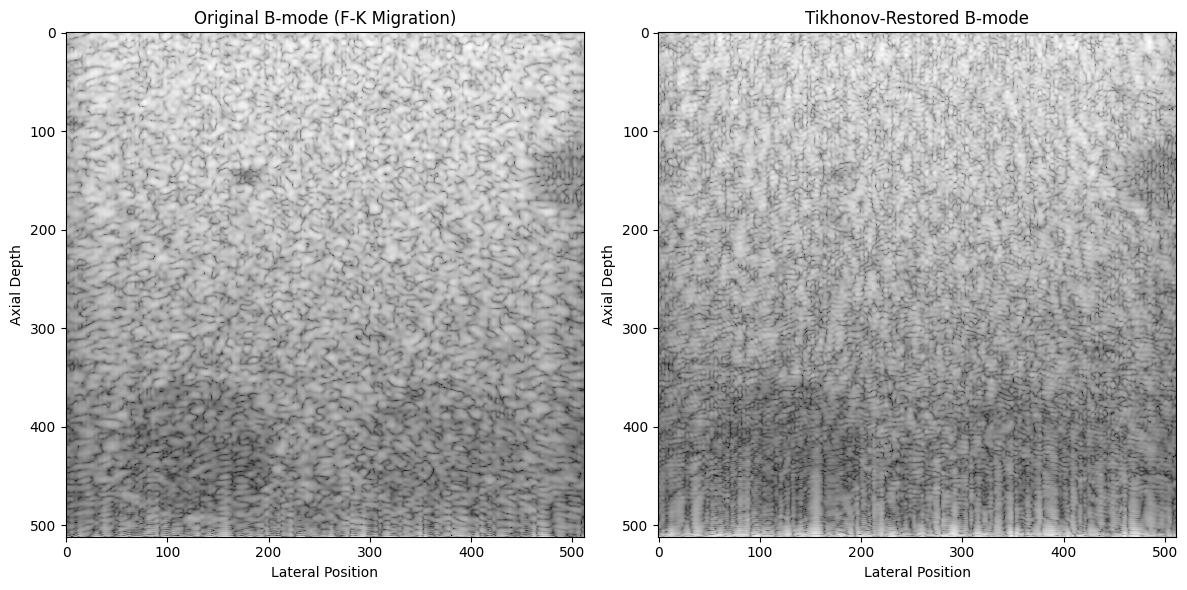


Image shapes after processing:
Original B-mode: (512, 512)
Restored B-mode: (512, 512)
SNR used: 800


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import hilbert
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')

# Function for B-mode conversion
def rf_to_bmode(x):
    envelope = np.abs(hilbert(x, axis=0))
    normalized = envelope / np.max(envelope)
    log_compressed = 20 * np.log10(normalized + np.finfo(float).eps)
    return np.maximum(log_compressed, -70)

# 1. Load and prepare RF data
data = loadmat('exp/datasets/Phantom/Phantom.mat')
rf = data['img_fkmig']
print(f"Original RF shape: {rf.shape}")

# Resize RF to 512×512
rf_resized = resize(rf_cropped, (512, 512), mode='reflect', anti_aliasing=True)
rfn = rf_resized / np.max(np.abs(rf_resized))
print(f"Resized RF shape: {rf_resized.shape}")

# 2. Load and prepare PSF
psf_data = loadmat('exp/datasets/Phantom/psf_512.mat')
H = psf_data['cropped_psf']
h = H / np.sum(np.abs(H))
Mh, Nh = h.shape
print(f"PSF shape: {h.shape}")

# 3. Pad PSF to match resized RF dimensions
pad_h = np.pad(h, ((0, rf_resized.shape[0]-Mh), (0, rf_resized.shape[1]-Nh)), mode='constant')
print(f"Padded PSF shape: {pad_h.shape}")

# Center the PSF
center = np.array([Mh, Nh]) // 2
pad_h = np.roll(pad_h, 1-center[0], axis=0)
pad_h = np.roll(pad_h, 1-center[1], axis=1)

# 4. Tikhonov deconvolution
D = np.fft.fft2(pad_h)
SNR_val = 800
RF_fft = np.fft.fft2(rfn)
VivoTK = np.fft.ifft2(RF_fft * np.conj(D) / (SNR_val**(-1) + np.conj(D)*D)).real
VivoTK = VivoTK / np.max(np.abs(VivoTK))  # Normalize result

# 5. Convert to B-mode
bmode = rf_to_bmode(rf_resized)
bmode_T = rf_to_bmode(VivoTK)

# 6. Display results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(bmode, cmap='gray', aspect='auto', vmin=-70, vmax=0)
axes[0].set_title('Original B-mode (F-K Migration)')
axes[0].set_xlabel('Lateral Position')
axes[0].set_ylabel('Axial Depth')

axes[1].imshow(bmode_T, cmap='gray', aspect='auto', vmin=-70, vmax=0)
axes[1].set_title('Tikhonov-Restored B-mode')
axes[1].set_xlabel('Lateral Position')
axes[1].set_ylabel('Axial Depth')

plt.tight_layout()
plt.show()

# Optional: Print some metrics
print(f"\nImage shapes after processing:")
print(f"Original B-mode: {bmode.shape}")
print(f"Restored B-mode: {bmode_T.shape}")
print(f"SNR used: {SNR_val}")

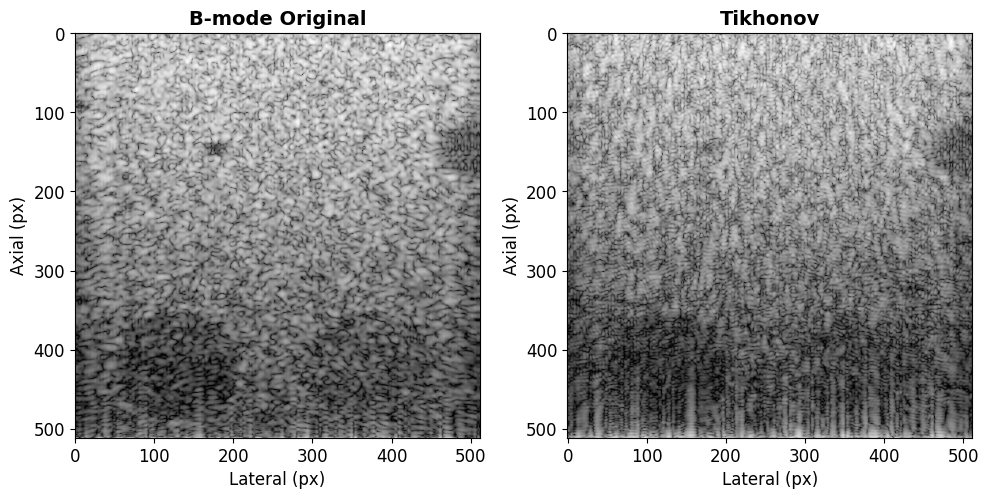

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import hilbert, correlate
import warnings
warnings.filterwarnings('ignore')

# 1. Load raw RF data
data = loadmat('exp/datasets/Phantom/rf_resized.mat')
rf = data['rf_resized']
rfn = rf / np.max(np.abs(rf))  # normalized RF

# 2. Tikhonov restoration (Wiener filter)
psf_data = loadmat('exp/datasets/Phantom/psf_512.mat')
H = psf_data['cropped_psf']
h = H / np.sum(np.abs(H))
Mh, Nh = H.shape
center = np.round(np.array([Mh, Nh])/2).astype(int)

pad_h = np.pad(h, ((0, rf.shape[0]-Mh), (0, rf.shape[1]-Nh)), mode='constant')
pad_h = np.roll(pad_h, 1-center[0], axis=0)
pad_h = np.roll(pad_h, 1-center[1], axis=1)

D = np.fft.fft2(pad_h)
SNR_val =1000  # ~60 dB
VivoTK = np.fft.ifft2(np.fft.fft2(rfn) * np.conj(D) / (SNR_val**(-1) + np.conj(D)*D)).real
#VivoTKn = VivoTK / np.max(np.abs(VivoTK))


# Raw data processing
env_raw = np.abs(hilbert(rf, axis=0))
env_raw = env_raw / np.max(env_raw)
bmode_raw = 20 * np.log10(env_raw + np.finfo(float).eps)
bmode_raw = np.maximum(bmode_raw, -50)

# Tikhonov processing
env_tikh = np.abs(hilbert(VivoTK, axis=0))
env_tikh = env_tikh / np.max(env_tikh)
bmode_tikh = 20 * np.log10(env_tikh + np.finfo(float).eps)
bmode_tikh = np.maximum(bmode_tikh, -50)



# 5. Visualization
fig = plt.figure(figsize=(10, 8))
fig.canvas.manager.set_window_title('B-mode Comparison')

titles = ['B-mode Original', 'Tikhonov']
images = [bmode_raw, bmode_tikh]

for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    im = ax.imshow(images[i], cmap='gray', vmin=-50, vmax=0, aspect='equal')
    ax.set_title(titles[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('Lateral (px)', fontsize=12)
    ax.set_ylabel('Axial (px)', fontsize=12)
    ax.tick_params(labelsize=12)



plt.tight_layout()
plt.show()


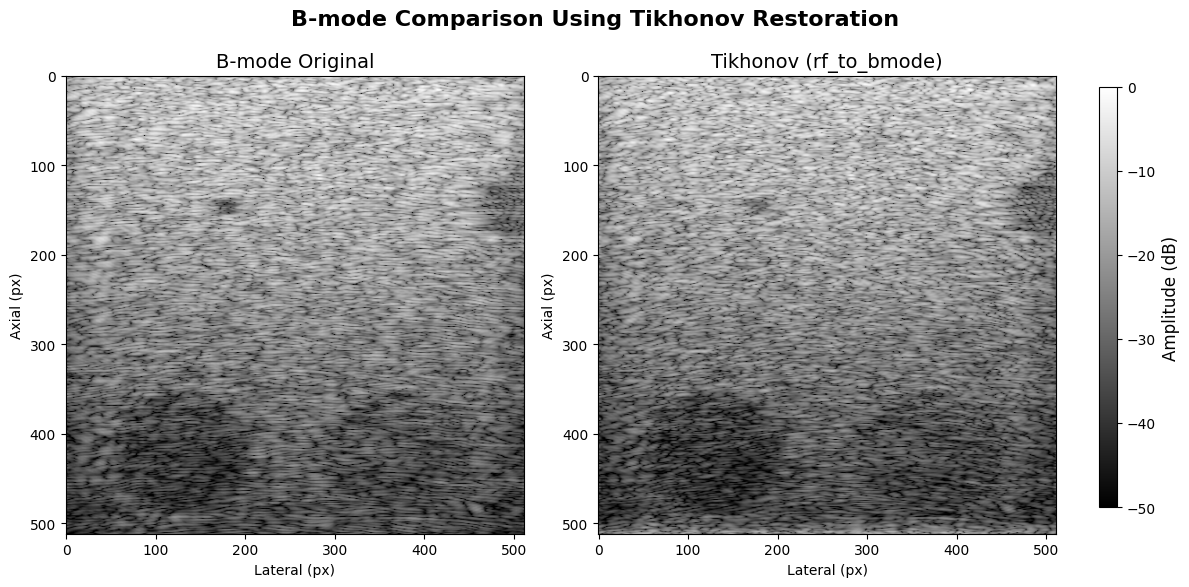

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import hilbert
import warnings
warnings.filterwarnings('ignore')

def rf_to_bmode(rf_image):
    """
    Convert RF image to B-mode image using envelope detection and log compression.
    
    Parameters:
    - rf_image: 2D numpy array, beamformed RF data
    
    Returns:
    - bmode_image: 2D numpy array, log-compressed B-mode image in dB
    """
    envelope = np.abs(hilbert(rf_image.T, axis=0)).T
    envelope_normalized = envelope / np.max(envelope)
    bmode_image = 20 * np.log10(np.finfo(float).eps + envelope_normalized)
    return bmode_image

# 1. Load raw RF data
data = loadmat('exp/datasets/Phantom/rf_resized.mat')  # replace with correct path
rf = data['rf_resized']
rfn = rf / np.max(np.abs(rf))  # normalized RF

# 2. Load and process PSF
psf_data = loadmat('exp/datasets/Phantom/psf_512.mat')  # replace with correct path
H = psf_data['cropped_psf']
h = H / np.sum(np.abs(H))
Mh, Nh = H.shape
center = np.round(np.array([Mh, Nh]) / 2).astype(int)

# Pad PSF to match RF shape
pad_h = np.pad(h, ((0, rf.shape[0] - Mh), (0, rf.shape[1] - Nh)), mode='constant')
pad_h = np.roll(pad_h, 1 - center[0], axis=0)
pad_h = np.roll(pad_h, 1 - center[1], axis=1)

# 3. Tikhonov (Wiener) Restoration
D = np.fft.fft2(pad_h)
SNR_val = 10**(20 / 10)  # 60 dB
VivoTK = np.fft.ifft2(np.fft.fft2(rfn) * np.conj(D) / (SNR_val**(-1) + np.conj(D) * D)).real

# 4. Convert RF and restored signals to B-mode
bmode_raw = rf_to_bmode(rf)
bmode_tikh = rf_to_bmode(VivoTK)

# Clip for display
bmode_raw_clipped = np.maximum(bmode_raw, -50)
bmode_tikh_clipped = np.maximum(bmode_tikh, -50)

# 5. Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('B-mode Comparison Using Tikhonov Restoration', fontsize=16, fontweight='bold')

titles = ['B-mode Original', 'Tikhonov (rf_to_bmode)']
images = [bmode_raw_clipped, bmode_tikh_clipped]

for i, ax in enumerate(axes):
    im = ax.imshow(images[i], cmap='gray', vmin=-50, vmax=0, aspect='equal')
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel('Lateral (px)')
    ax.set_ylabel('Axial (px)')

# External colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Amplitude (dB)', fontsize=12)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


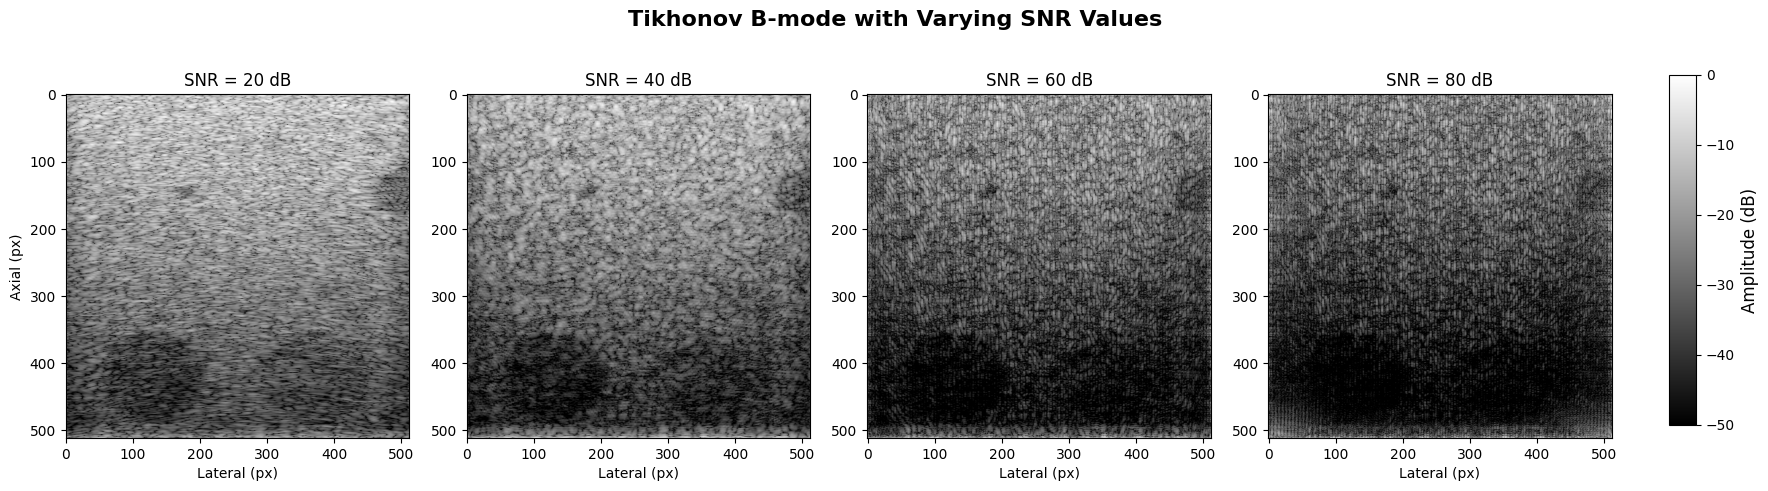

In [31]:
# Define different SNR values in dB
snr_db_values = [20, 40, 60, 80]  # dB
snr_linear_values = [10**(val / 10) for val in snr_db_values]

# Store B-mode outputs
bmode_tikh_list = []

for SNR_val in snr_linear_values:
    # Apply Tikhonov restoration
    VivoTK_temp = np.fft.ifft2(np.fft.fft2(rfn) * np.conj(D) / (SNR_val**(-1) + np.conj(D)*D)).real
    bmode_tikh_temp = rf_to_bmode(VivoTK_temp)
    bmode_tikh_temp_clipped = np.maximum(bmode_tikh_temp, -50)
    bmode_tikh_list.append(bmode_tikh_temp_clipped)

# Plot all restored B-mode images for different SNRs
fig, axes = plt.subplots(1, len(snr_db_values), figsize=(18, 5))
fig.suptitle('Tikhonov B-mode with Varying SNR Values', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes):
    im = ax.imshow(bmode_tikh_list[i], cmap='gray', vmin=-50, vmax=0, aspect='equal')
    ax.set_title(f'SNR = {snr_db_values[i]} dB', fontsize=12)
    ax.set_xlabel('Lateral (px)')
    if i == 0:
        ax.set_ylabel('Axial (px)')

# Add single colorbar
cbar_ax = fig.add_axes([0.93, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Amplitude (dB)', fontsize=12)

plt.tight_layout(rect=[0, 0, 0.91, 1])
plt.show()


In [32]:
from scipy.io import savemat
savemat('exp/datasets/Phantom/VivoTK.mat', {'VivoTK': VivoTK})

In [33]:
# Save the figure
output_path = "exp/image_samples/Phantom/bmode_original_Tikhonov.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight')

### DDRM

In [34]:
folder_name = "Phantom"

In [38]:
!python main.py --ni --config deblur_phantom.yml --doc imagenet_ood --timesteps 20 --eta 0.85 --etaB 1 --deg deblur_bccb --sigma_0 20 -i {folder_name}

Traceback (most recent call last):
  File "/projects/minds/PDAS-M2-2025/Stable_DDRM/main.py", line 12, in <module>
    from runners.diffusion import Diffusion
  File "/projects/minds/PDAS-M2-2025/Stable_DDRM/runners/diffusion.py", line 13, in <module>
    from datasets import get_dataset, data_transform, inverse_data_transform
  File "/projects/minds/PDAS-M2-2025/Stable_DDRM/datasets/__init__.py", line 267
    elif config.data.dataset == 'phantom':
                                          ^
IndentationError: unindent does not match any outer indentation level
